# Linear Regression vs Linear Gaussian State Space Models

This notebook compares the classical linear regression model with the linear Gaussian state-space model (dynamic linear model, DLM).

We will:
- Explain both models mathematically and conceptually
- Visualize their differences in modeling time series data
- Use scikit-learn for linear regression and simulate a simple linear Gaussian state-space model

## 1. Linear Regression

Linear regression models the relationship between input $X$ and output $y$ as:
$$
y = X\beta + \epsilon, \quad \epsilon \sim N(0, \sigma^2)
$$
where $\beta$ are regression coefficients and $\epsilon$ is Gaussian noise.

Assumptions:
- Observations are independent
- Noise is identically distributed
- No temporal or latent structure

## 2. Linear Gaussian State Space Model (DLM)

The DLM introduces a hidden state $x_t$ evolving over time:
- **State equation:**
$$
x_t = \Phi x_{t-1} + w_t, \quad w_t \sim N(0, Q)
$$
- **Observation equation:**
$$
y_t = A x_t + v_t, \quad v_t \sim N(0, R)
$$

Key differences:
- Models temporal dependence (Markov process)
- Observations depend on latent states
- Can handle missing data, nonstationarity, and complex dependencies

## 3. Mathematical Comparison

| Model | Equation | Temporal Structure | Latent State |
|-------|----------|-------------------|--------------|
| Linear Regression | $y = X\beta + \epsilon$ | No | No |
| Linear Gaussian SSM | $x_t = \Phi x_{t-1} + w_t$<br>$y_t = A x_t + v_t$ | Yes | Yes |

## 4. Simulation and Visualization
We simulate both models and compare their fit and predictions.

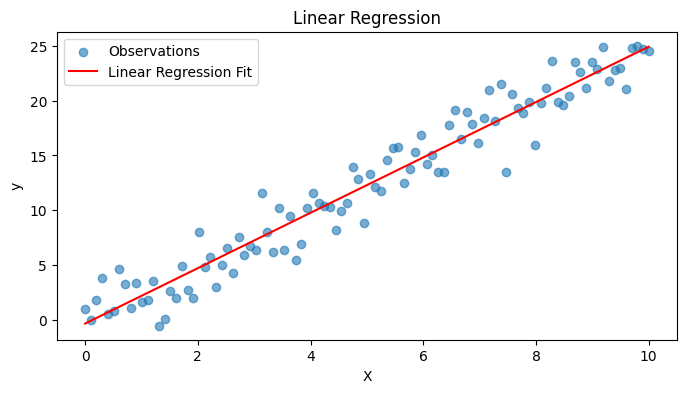

In [1]:
# Linear Regression Example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n = 100
X = np.linspace(0, 10, n).reshape(-1, 1)
true_coef = 2.5
y = true_coef * X.squeeze() + np.random.normal(0, 2, n)

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

plt.figure(figsize=(8,4))
plt.scatter(X, y, label='Observations', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Linear Regression Fit')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Linear Regression: Observations are modeled directly as a function of input, with no temporal or latent structure.

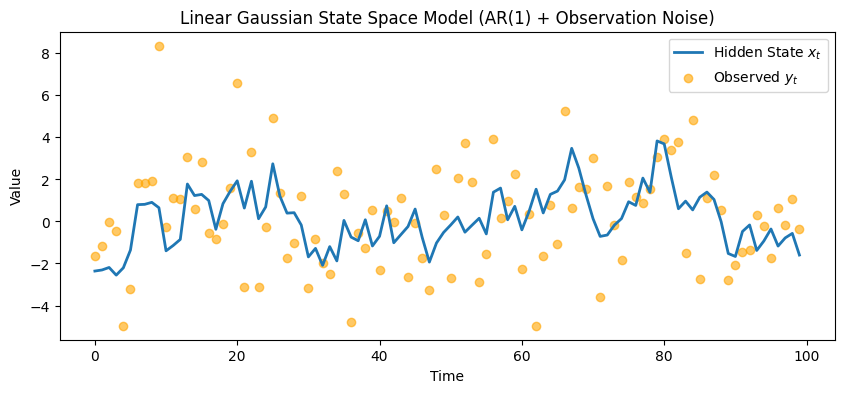

In [2]:
# Linear Gaussian State Space Model Example (Simple AR(1) with observation noise)
T = 100
phi = 0.8
Q = 1.0
R = 4.0

x = np.zeros(T)
y_ssm = np.zeros(T)
x[0] = np.random.normal(0, np.sqrt(Q/(1-phi**2)))
for t in range(1, T):
    x[t] = phi * x[t-1] + np.random.normal(0, np.sqrt(Q))
for t in range(T):
    y_ssm[t] = x[t] + np.random.normal(0, np.sqrt(R))

plt.figure(figsize=(10,4))
plt.plot(x, label='Hidden State $x_t$', linewidth=2)
plt.scatter(np.arange(T), y_ssm, label='Observed $y_t$', color='orange', alpha=0.6)
plt.title('Linear Gaussian State Space Model (AR(1) + Observation Noise)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

**Explanation of Parameters in the Linear Gaussian State Space Model:**

- `phi = 0.8`: The autoregressive coefficient. It controls how strongly the current hidden state $x_t$ depends on the previous state $x_{t-1}$. Values close to 1 mean strong persistence; values near 0 mean weak dependence.
- `Q = 1.0`: The process noise variance. It determines how much random fluctuation is added to the hidden state at each time step.
- `R = 4.0`: The observation noise variance. It controls how noisy the observed data $y_t$ are compared to the true hidden state $x_t$.

In the simulation, we first generate the hidden state sequence $x_t$ using an AR(1) process (state equation), then generate observations $y_t$ by adding Gaussian noise to each hidden state (observation equation). This models a scenario where the true system evolves smoothly, but our measurements are noisy.

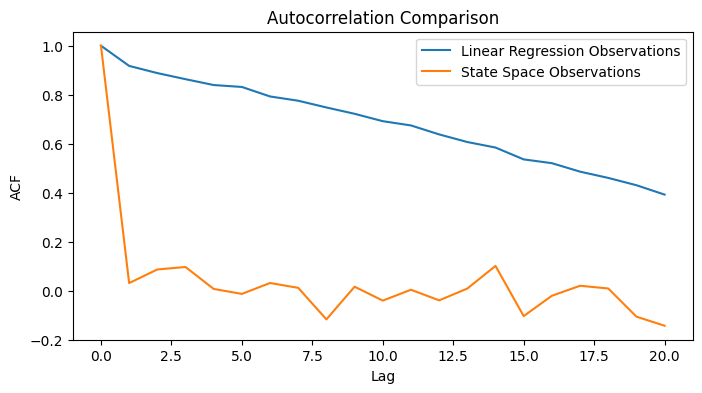

In [3]:
# Compare autocorrelation of observations
from statsmodels.tsa.stattools import acf

acf_lr = acf(y, nlags=20)
acf_ssm = acf(y_ssm, nlags=20)

plt.figure(figsize=(8,4))
plt.plot(acf_lr, label='Linear Regression Observations')
plt.plot(acf_ssm, label='State Space Observations')
plt.title('Autocorrelation Comparison')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.legend()
plt.show()

### Example: Hidden State with Trend and Seasonality

Instead of a simple autoregressive hidden state, we can model the hidden state as a combination of a deterministic trend, a seasonal component, and stochastic noise. This is common in time series modeling where the underlying process has structure beyond AR(1).

- **State equation:** $x_t = x_{t-1} + \delta + \gamma \sin(2\pi t / s) + w_t$

where:
- $\delta$ is a drift (trend) parameter
- $\gamma$ is the amplitude of the seasonal component
- $s$ is the season period
- $w_t$ is Gaussian noise

The observation equation remains: $y_t = x_t + v_t$

This model captures both a long-term trend and periodic fluctuations in the hidden state.

In [ ]:
# Linear Gaussian State Space Model with Trend and Seasonality in Hidden State
T = 100
delta = 0.1    # Drift (trend)
gamma = 2.0    # Seasonal amplitude
s = 12         # Season period
Q = 1.0        # Process noise variance
R = 4.0        # Observation noise variance

x_trend = np.zeros(T)
y_trend = np.zeros(T)
x_trend[0] = np.random.normal(0, np.sqrt(Q))
for t in range(1, T):
    seasonal = gamma * np.sin(2 * np.pi * t / s)
    x_trend[t] = x_trend[t-1] + delta + seasonal + np.random.normal(0, np.sqrt(Q))
for t in range(T):
    y_trend[t] = x_trend[t] + np.random.normal(0, np.sqrt(R))

plt.figure(figsize=(10,5))
plt.plot(x_trend, label='Hidden State $x_t$ (trend + seasonality)')
plt.scatter(np.arange(T), y_trend, label='Observed $y_t$', color='orange', alpha=0.5)
plt.title('State Space Model: Hidden State with Trend and Seasonality')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 5. Summary

- **Linear regression** is simple, assumes independence, and does not model latent or temporal structure.
- **Linear Gaussian state-space models** capture hidden states and temporal dependencies, and are more flexible for time series and missing data.

In practice, state-space models are preferred for dynamic systems, while linear regression is suitable for static, independent data.